# chatMTL Data Analytics

In this notebook, we'll perform a comprehensive analysis of the chatbot's data to gain insights into user behavior, bot performance, and other important metrics.

## 1. User Analysis

### 1.1 Extracting User Data

Extract and visualize data such as user messages count, session duration, selected categories, feedback, etc.

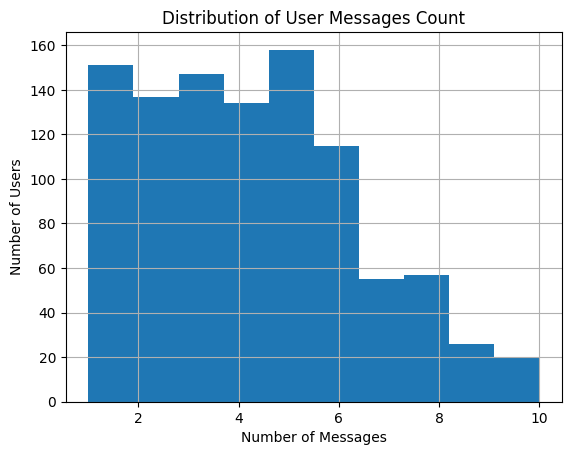

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the session data into a pandas dataframe
filename = "session_data.csv"
df = pd.read_csv(filename)

# Visualizing user messages count
df['user_msg_count'].hist()
plt.title('Distribution of User Messages Count')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
plt.show()

### 1.2 Extracting User Demographics

Visualize data related to user's DOB (Age distribution, etc.).

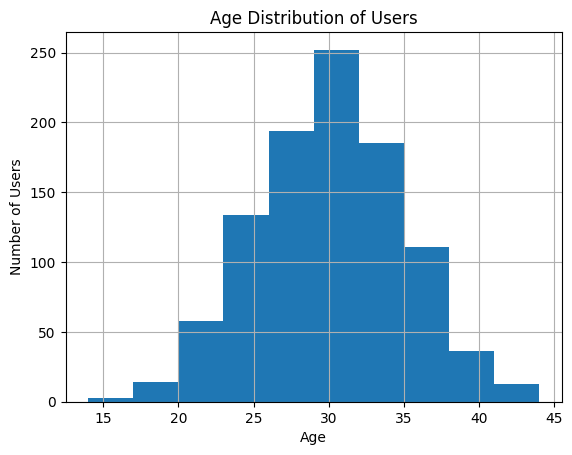

In [2]:
from datetime import datetime

# Extract year from DOB and calculate age
current_year = datetime.now().year
df['year_of_birth'] = pd.to_datetime(df['user_dob']).dt.year
df['age'] = current_year - df['year_of_birth']

# Visualizing age distribution
df['age'].hist()
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## 2. Bot Analysis

### 2.1 Extracting Bot Data

Extract and visualize data such as bot messages count, session duration, etc.

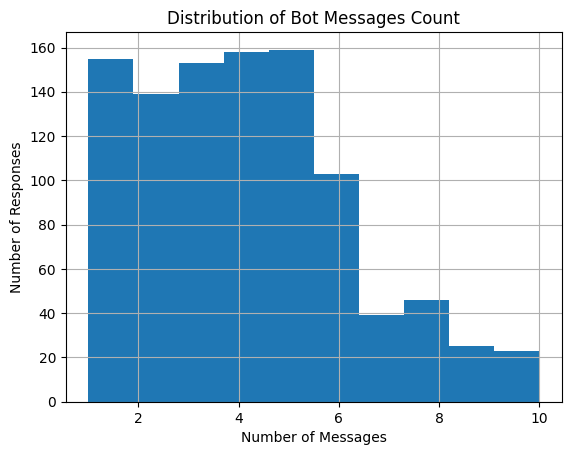

In [3]:
# Visualizing bot messages count
df['bot_msg_count'].hist()
plt.title('Distribution of Bot Messages Count')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Responses')
plt.show()

## 3. Session Analysis

### 3.1 Session Duration

Analyze the duration of sessions and visualize them to determine peak usage times.

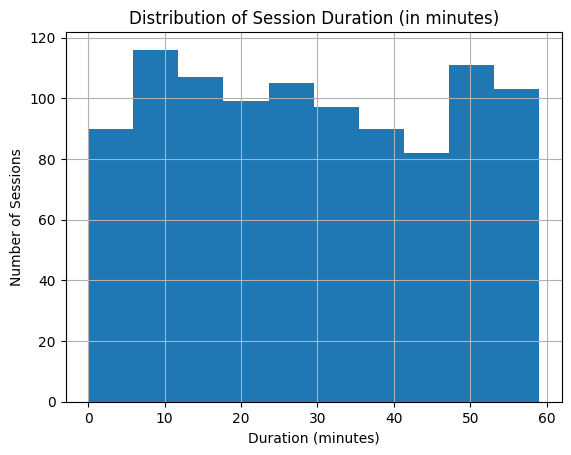

In [4]:
# Parsing session_duration to extract minutes and visualize
df['session_minutes'] = df['session_duration'].str.split(':').str[1].astype(int)
df['session_minutes'].hist()
plt.title('Distribution of Session Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Sessions')
plt.show()

## 4. Feedback Analysis

### 4.1 Feedback Type

Use the feedback type data to determine user satisfaction and areas of improvement.

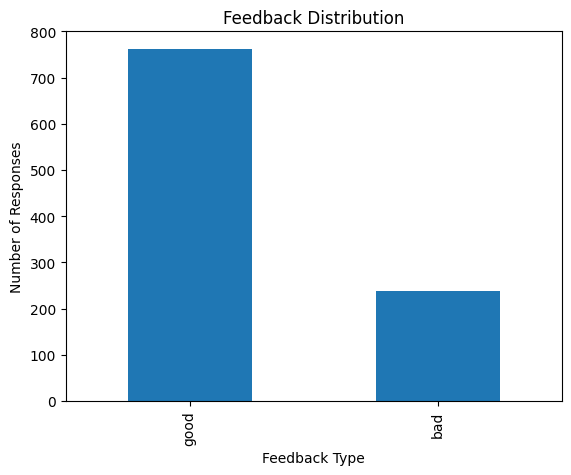

In [5]:
# Visualizing feedback data
df['feedback'].value_counts().plot(kind='bar')
plt.title('Feedback Distribution')
plt.xlabel('Feedback Type')
plt.ylabel('Number of Responses')
plt.show()

### 4.2 Feedback Sentiment

Use sentiment analysis to determine the overall sentiment of user's detailed feedback, to validate Feedback Type.

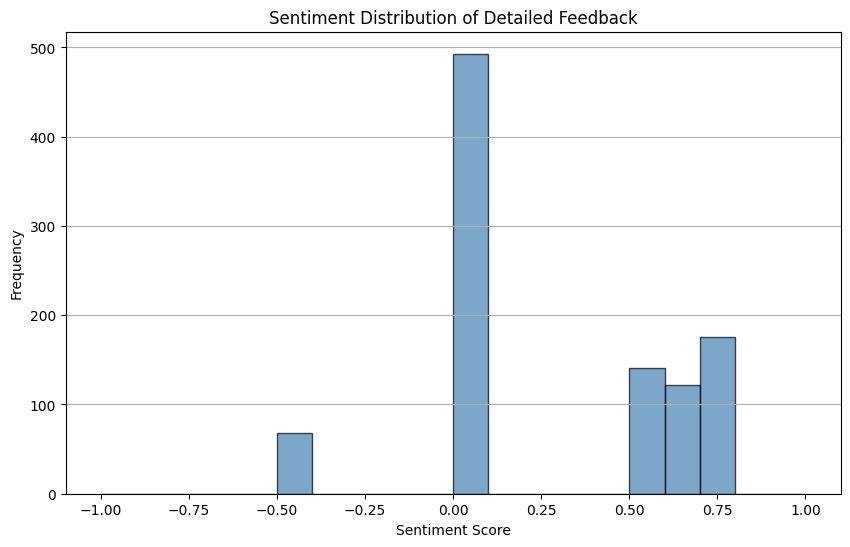

In [6]:
# Define stopwords and a simple lexicon for sentiment analysis
stopwords = {
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", 
    "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", 
    "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", 
    "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
    "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", 
    "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", 
    "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", 
    "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", 
    "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", 
    "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", 
    "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
    "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", 
    "yourselves"
}

# A simple lexicon for sentiment scores
sentiment_lexicon = {
    'love': 3,
    'great': 3,
    'best': 3,
    'awesome': 3,
    'good': 2,
    'decent': 1,
    'helpful': 2,
    'positive': 2,
    'negative': -2,
    'bad': -3,
    'worst': -3,
    'hate': -3,
    'confusing': -2,
    'hard': -2,
    'missed': -2,
    'improve': -1,
}

def sentiment_score(review):
    words = [word for word in re.findall(r'\w+', review.lower()) if word not in stopwords]
    return sum([sentiment_lexicon[word] for word in words if word in sentiment_lexicon]) / len(words)

# Apply sentiment analysis on 'detailed_feedback' column
df['sentiment'] = df['detailed_feedback'].apply(sentiment_score)

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=np.linspace(-1, 1, 21), alpha=0.7, color="steelblue", edgecolor="black")
plt.title("Sentiment Distribution of Detailed Feedback")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

## 5. Category Analysis

### 5.1 Popular Categories

Visualize which categories are more popular among users.

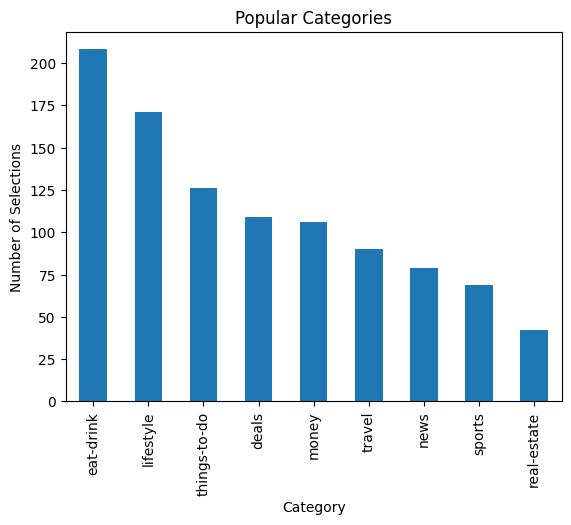

In [7]:
df['selected_category'].value_counts().plot(kind='bar')
plt.title('Popular Categories')
plt.xlabel('Category')
plt.ylabel('Number of Selections')
plt.show()